<a href="https://colab.research.google.com/github/EAkeweje/GEOMETRIC-LEARNING-FOR-FLOWS-IN-POROUS-SYSTEMS/blob/main/Extraction%20of%20Pore%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install porespy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 4.4 MB/s 
     |████████████████████████████████| 3.5 MB 33.8 MB/s 
     |████████████████████████████████| 421 kB 40.7 MB/s 
     |████████████████████████████████| 2.8 MB 28.5 MB/s 
     |████████████████████████████████| 652 kB 37.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 432 kB 34.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 23.3 MB 57.0 MB/s 
     |████████████████████████████████| 181 kB 38.3 MB/s 
     |████████████████████████████████| 2.3 MB 38.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=

In [2]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import networkx as nx
ps.visualization.set_mpl_style()
np.random.seed(10)

In [3]:
%cd /content/drive/MyDrive/Skoltech/Research/GDL

/content/drive/MyDrive/Skoltech/Research/GDL


In [4]:
#####custom functions########
import os
import sys
sys.path.append(os.getcwd()+'/scripts')

import utils
from NWR import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


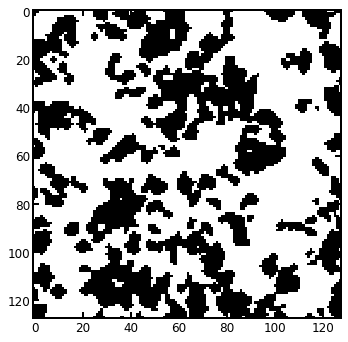

In [27]:
img_array = utils.gen_pore_array("./Dataset/Fluid Flow Simulation/1.png") #import pore image
kernel_size = 2
im = utils.coarse_grain(np.rot90(img_array),kernel_size) #coarse-grain pore
#There is a need to adjust the array and convert to boolen data type because thats what porespy and openpnm wants
#True implies there is pore space while false implies no pore space
im = np.where(im < kernel_size**2/2, True, False)
# print(im)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im, cmap ='gray');

In [28]:
snow_output = ps.networks.snow2(im, voxel_size=1.0, boundary_width=0,r_max=1, sigma=0.1)

2022-07-19 22:27:43 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 28 saddle points
2022-07-19 22:27:43 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 46 saddle points
2022-07-19 22:27:44 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 35 saddle points
2022-07-19 22:27:44 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 31 saddle points


In [29]:
snow_output.network.keys()

dict_keys(['throat.conns', 'pore.coords', 'pore.all', 'throat.all', 'pore.region_label', 'pore.phase', 'throat.phases', 'pore.region_volume', 'pore.equivalent_diameter', 'pore.local_peak', 'pore.global_peak', 'pore.geometric_centroid', 'throat.global_peak', 'pore.inscribed_diameter', 'pore.extended_diameter', 'throat.inscribed_diameter', 'throat.total_length', 'throat.direct_length', 'throat.perimeter', 'pore.volume', 'pore.surface_area', 'throat.cross_sectional_area', 'throat.equivalent_diameter'])

In [30]:
try:
    proj = op.io.PoreSpy.import_data(snow_output.network)
except AttributeError:
    proj = op.io.from_porespy(snow_output.network)

In [31]:
print(proj)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 Object Name     Object ID                                                        
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 net_01          <openpnm.network.GenericNetwork object at 0x7fc1ec883590>        
 geo_01          <openpnm.geometry.Imported object at 0x7fc1e3336a70>             
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [32]:
pn = proj['net_01']
geo = proj['geo_01']

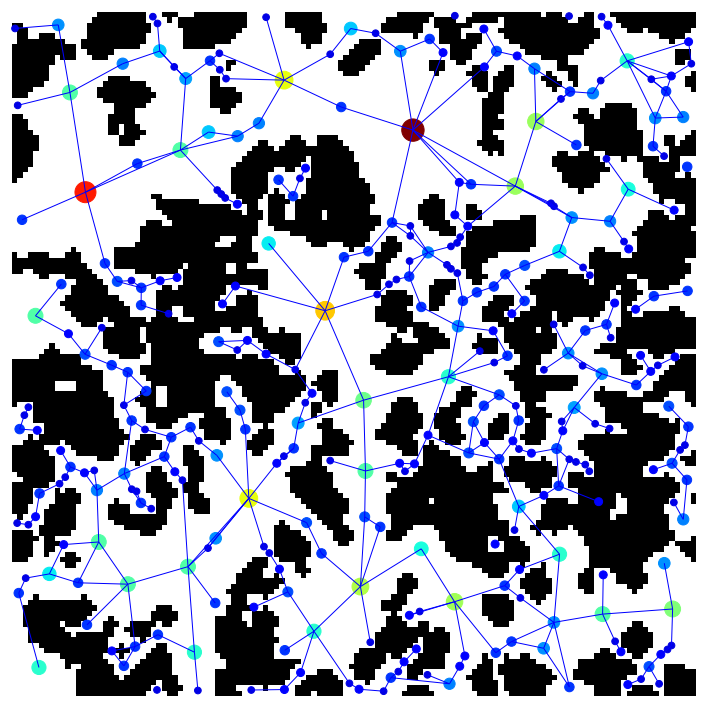

In [33]:
fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(im.T, cmap=plt.cm.bone);
op.topotools.plot_coordinates(ax=ax,
                              network=pn,
                              size_by=pn["pore.inscribed_diameter"],
                              color_by=pn["pore.inscribed_diameter"],
                              markersize=500)
op.topotools.plot_connections(network=pn, ax=ax)
ax.axis("off");

In [34]:
pn

In [35]:
pn_networkx = op.io.NetworkX.export_data(pn)

In [36]:
pn_networkx.nodes(data='geometric_centroid')

NodeDataView({0: [4.478260869565218, 4.773913043478261], 1: [0.7, 18.7], 2: [0.4, 31.8], 3: [4.588235294117647, 37.35294117647059], 4: [0.8666666666666667, 49.4], 5: [3.8296296296296295, 70.60740740740741], 6: [1.32, 88.58], 7: [0.5, 110.0], 8: [0.0, 124.4], 9: [2.0, 21.5], 10: [1.75, 52.0], 11: [8.09375, 125.0625], 12: [2.5, 31.5], 13: [3.8461538461538463, 33.0], 14: [2.5, 53.5], 15: [13.186858316221766, 93.74537987679672], 16: [10.278481012658228, 112.41772151898734], 17: [6.430769230769231, 22.29230769230769], 18: [4.166666666666666, 49.166666666666664], 19: [8.538461538461538, 45.38461538461539], 20: [8.333333333333334, 39.166666666666664], 21: [8.666666666666666, 76.53333333333333], 22: [9.11111111111111, 27.77777777777778], 23: [9.4, 40.4], 24: [10.375, 42.3125], 25: [13.11111111111111, 63.4], 26: [13.470588235294118, 12.764705882352942], 27: [10.0, 67.25], 28: [11.8125, 20.625], 29: [15.673267326732674, 28.26732673267327], 30: [15.333333333333332, 37.96969696969697], 31: [13.0, 

In [37]:
pn_networkx.edges(data=False)#'geometric_centroid')

EdgeView([(0, 1), (1, 9), (2, 12), (3, 13), (3, 20), (4, 10), (4, 18), (5, 21), (5, 27), (6, 15), (7, 16), (8, 11), (9, 17), (10, 14), (11, 16), (12, 13), (15, 16), (15, 35), (15, 51), (15, 55), (16, 41), (17, 22), (17, 28), (19, 24), (20, 23), (22, 29), (23, 24), (24, 31), (25, 27), (25, 34), (25, 38), (26, 32), (28, 29), (28, 32), (29, 30), (29, 32), (30, 31), (30, 33), (30, 40), (31, 33), (32, 43), (32, 66), (35, 39), (36, 42), (36, 43), (37, 38), (37, 45), (37, 47), (39, 49), (39, 50), (40, 44), (40, 46), (40, 60), (41, 56), (42, 43), (43, 58), (44, 45), (44, 54), (45, 47), (46, 52), (46, 53), (48, 49), (48, 61), (49, 50), (49, 63), (51, 55), (52, 53), (52, 59), (54, 67), (55, 64), (55, 75), (55, 84), (55, 97), (56, 64), (56, 65), (56, 71), (58, 69), (60, 67), (60, 68), (62, 65), (63, 70), (64, 71), (64, 83), (66, 69), (66, 73), (66, 76), (66, 78), (66, 80), (67, 74), (68, 73), (69, 72), (74, 77), (75, 97), (76, 79), (76, 80), (77, 81), (79, 80), (80, 81), (80, 98), (80, 107), (80,

In [38]:
#round up sensor locations
node_pos = {}
for key in dict(pn_networkx.nodes(data= 'geometric_centroid')).keys():
  val = dict(pn_networkx.nodes(data= 'geometric_centroid'))[key]
  node_pos[key] = (round(val[0]), round(val[1]))

In [39]:
#make graph with only one attribute
pn_networkx_copy = nx.Graph()
pn_networkx_copy.add_nodes_from(pn_networkx.nodes(data= False))
pn_networkx_copy.add_edges_from(pn_networkx.edges(data=False))
nx.set_node_attributes(pn_networkx_copy, node_pos, 'node_pos' )

In [40]:
pn_networkx_copy.nodes(data=True)

NodeDataView({0: {'node_pos': (4, 5)}, 1: {'node_pos': (1, 19)}, 2: {'node_pos': (0, 32)}, 3: {'node_pos': (5, 37)}, 4: {'node_pos': (1, 49)}, 5: {'node_pos': (4, 71)}, 6: {'node_pos': (1, 89)}, 7: {'node_pos': (0, 110)}, 8: {'node_pos': (0, 124)}, 9: {'node_pos': (2, 22)}, 10: {'node_pos': (2, 52)}, 11: {'node_pos': (8, 125)}, 12: {'node_pos': (2, 32)}, 13: {'node_pos': (4, 33)}, 14: {'node_pos': (2, 54)}, 15: {'node_pos': (13, 94)}, 16: {'node_pos': (10, 112)}, 17: {'node_pos': (6, 22)}, 18: {'node_pos': (4, 49)}, 19: {'node_pos': (9, 45)}, 20: {'node_pos': (8, 39)}, 21: {'node_pos': (9, 77)}, 22: {'node_pos': (9, 28)}, 23: {'node_pos': (9, 40)}, 24: {'node_pos': (10, 42)}, 25: {'node_pos': (13, 63)}, 26: {'node_pos': (13, 13)}, 27: {'node_pos': (10, 67)}, 28: {'node_pos': (12, 21)}, 29: {'node_pos': (16, 28)}, 30: {'node_pos': (15, 38)}, 31: {'node_pos': (13, 41)}, 32: {'node_pos': (21, 20)}, 33: {'node_pos': (15, 42)}, 34: {'node_pos': (16, 68)}, 35: {'node_pos': (17, 80)}, 36: {'n

In [41]:
for i in range(10):
  print(pn_networkx.nodes(data= 'geometric_centroid')[i])

[4.478260869565218, 4.773913043478261]
[0.7, 18.7]
[0.4, 31.8]
[4.588235294117647, 37.35294117647059]
[0.8666666666666667, 49.4]
[3.8296296296296295, 70.60740740740741]
[1.32, 88.58]
[0.5, 110.0]
[0.0, 124.4]
[2.0, 21.5]


In [42]:
nodes = [0,1,2,3,4,5,6,7,8,9]

In [43]:
def get_node_pos(G, node_list):
  '''
  inputs:::
  G: nx Graph
  node_list (list): A list of nodes to place gauges

  return:::
  A list of node position in the porous structure
  '''
  pos = []
  for i in node_list:
    pos.append(G.nodes(data = 'node_pos')[i])
  return pos

In [44]:
get_node_pos(pn_networkx_copy, nodes)

[(4, 5),
 (1, 19),
 (0, 32),
 (5, 37),
 (1, 49),
 (4, 71),
 (1, 89),
 (0, 110),
 (0, 124),
 (2, 22)]

In [45]:
nx.write_gpickle(pn_networkx_copy, "pore_network_02.gpickle")

In [46]:
G = nx.read_gpickle("pore_network_02.gpickle")

In [47]:
get_node_pos(G,nodes)

[(4, 5),
 (1, 19),
 (0, 32),
 (5, 37),
 (1, 49),
 (4, 71),
 (1, 89),
 (0, 110),
 (0, 124),
 (2, 22)]